In [5]:
import scipy.stats as stats
import numpy as np
import statsmodels.stats.multicomp as multi
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

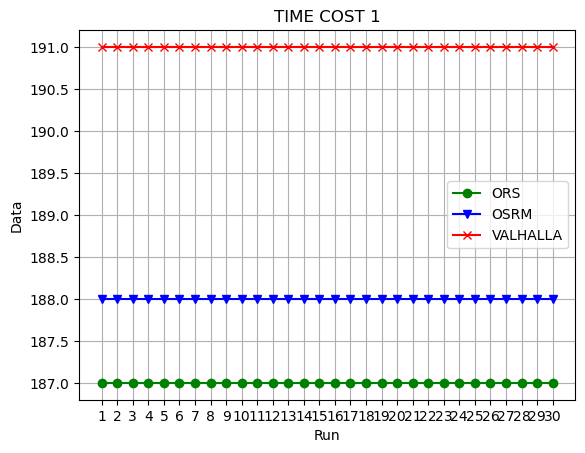

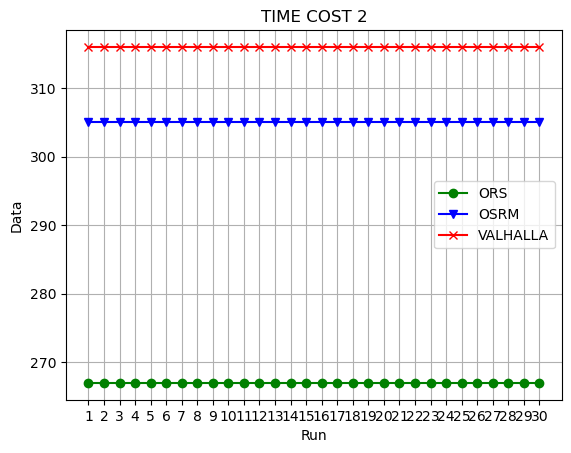

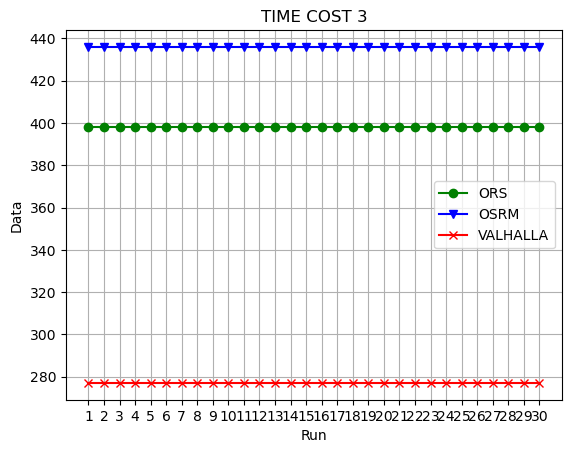

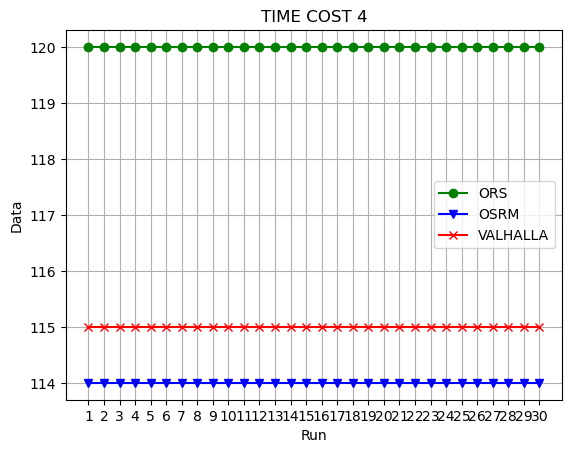

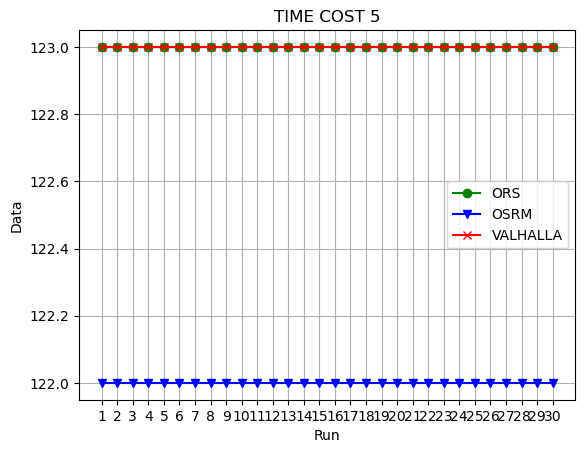

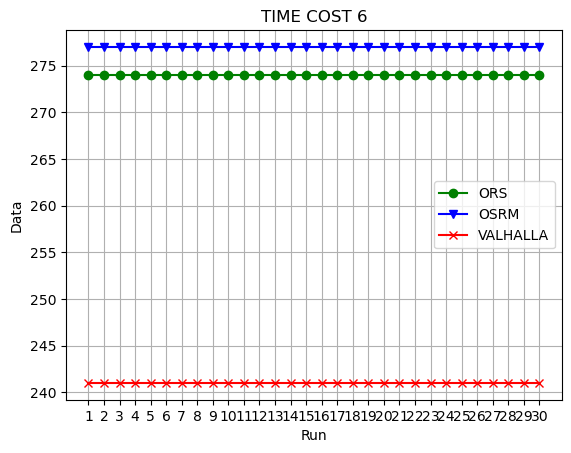

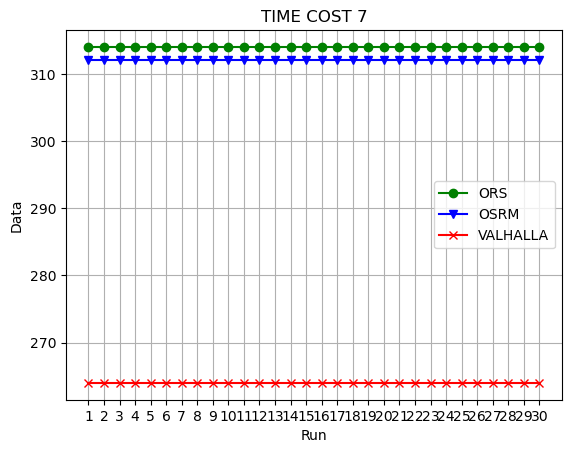

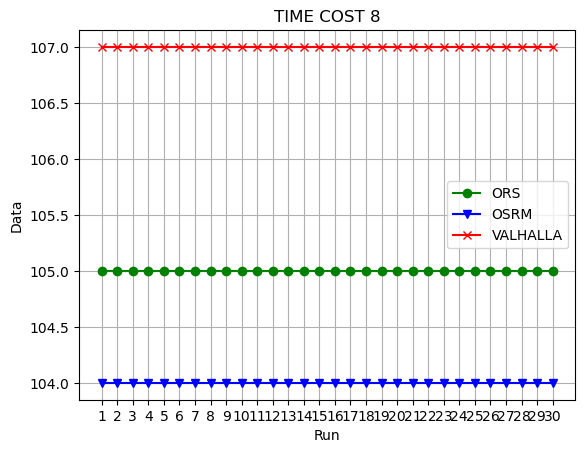

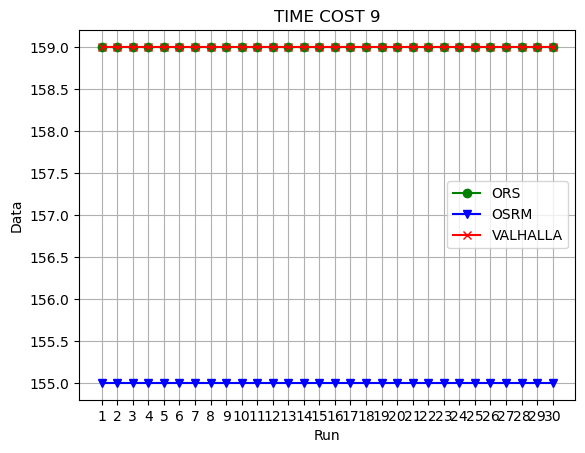

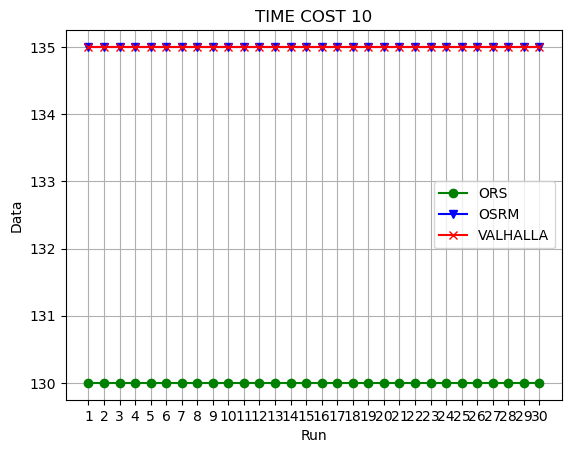

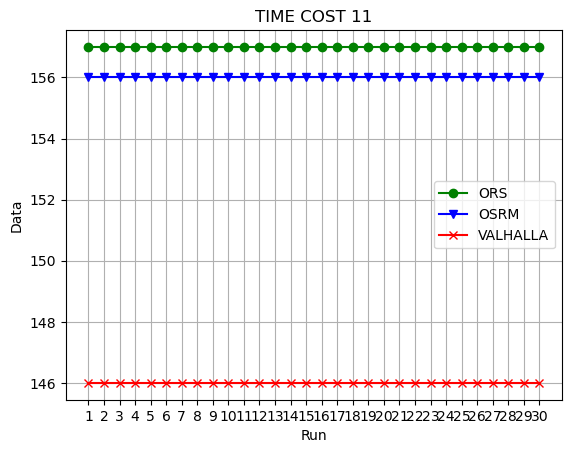

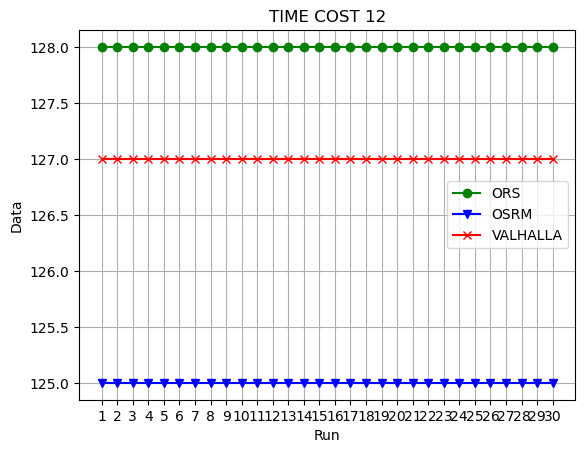

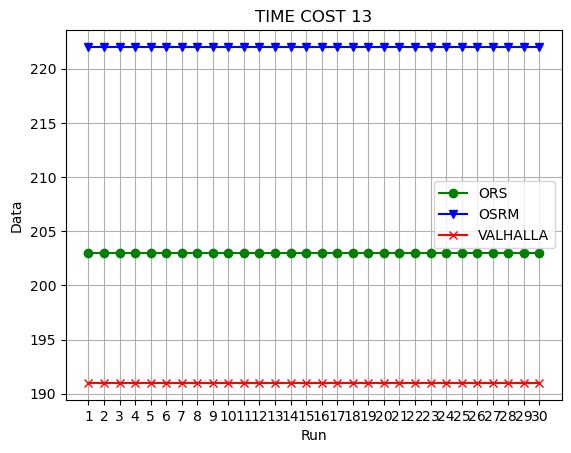

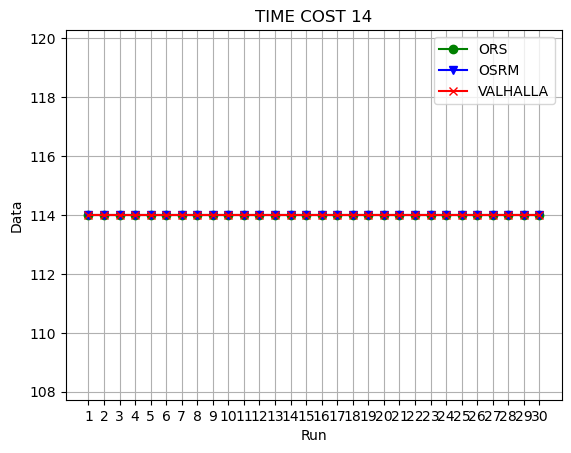

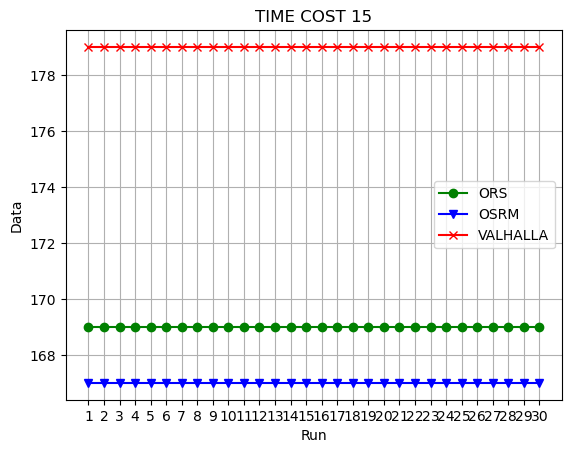

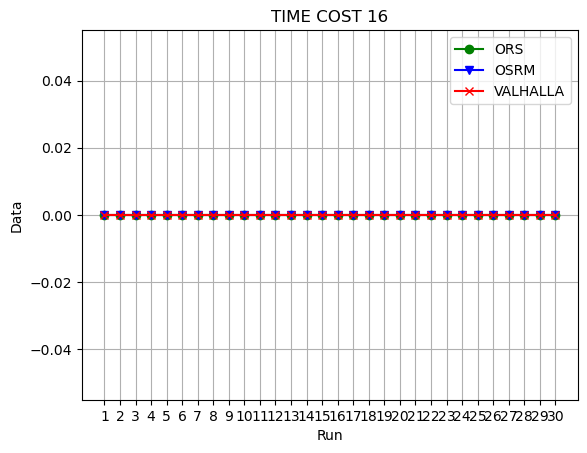

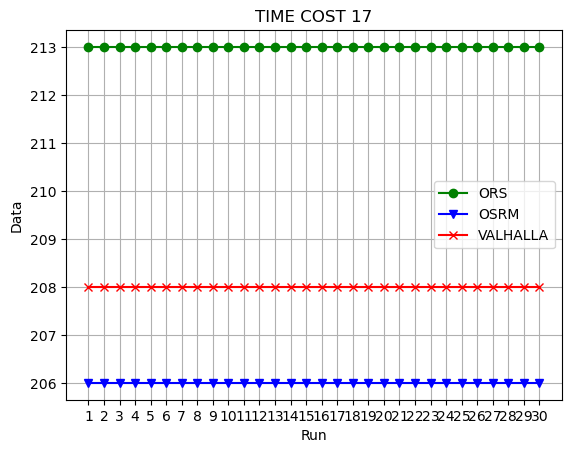

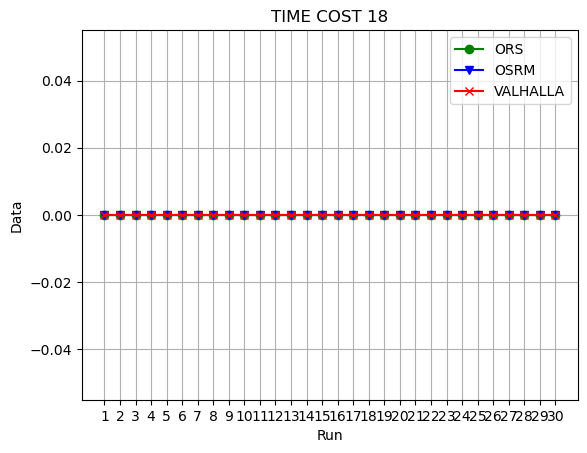

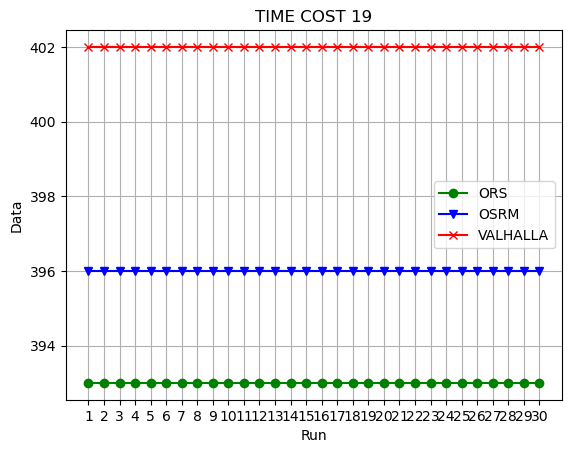

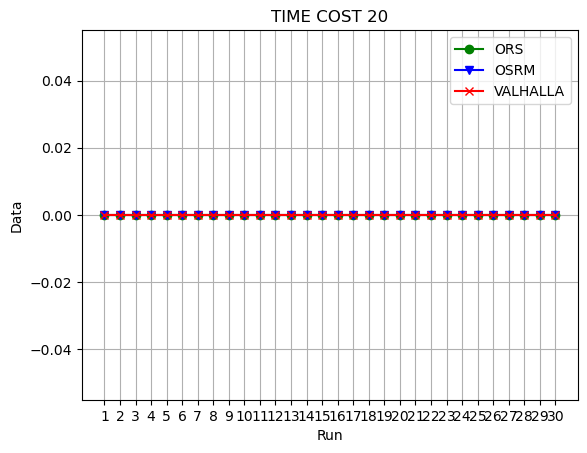

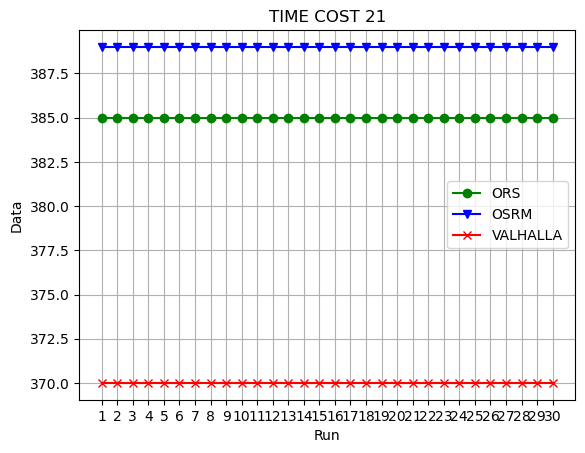

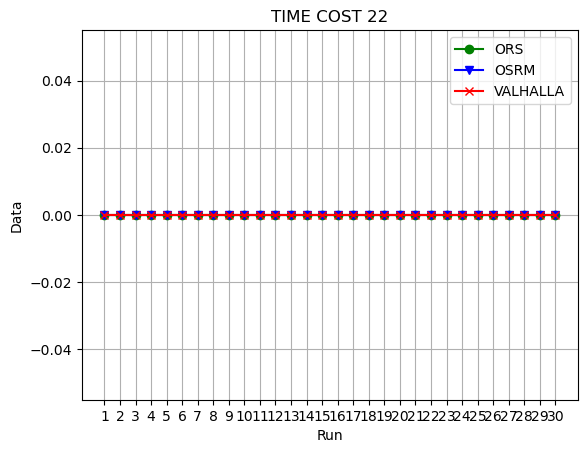

In [40]:
#Read your data from file
file = "Data/Resultat/MIX.txt"
df = pd.read_csv(file, sep=",", header=0)
# Plot line serie of data
names=['ORS','OSRM','VALHALLA']
ORS_start = 0
ORS_end = 30
OSRM_start = 30
OSRM_end = 60
VALHALLA_start = 60
VALHALLA_end = 90
for item in range(1,23):    
    for name in names: 
        x = range(1,31) 
        if(name=='ORS'):
            y = df['TOTAL_COST'].iloc[ORS_start:ORS_end].tolist() 
            plt.plot(x, y,color = 'green', label='ORS', marker='o')
        elif(name=='OSRM'):
            y = df['TOTAL_COST'].iloc[OSRM_start:OSRM_end].tolist() 
            plt.plot(x, y,color = 'blue', label='OSRM', marker='v')
        elif(name=='VALHALLA'): 
            y = df['TOTAL_COST'].iloc[VALHALLA_start:VALHALLA_end].tolist() 
            plt.plot(x, y,color = 'red', label='VALHALLA', marker='x')
        else:
            plt.plot(x, y)
    ORS_start += 90
    ORS_end += 90
    OSRM_start += 90
    OSRM_end += 90
    VALHALLA_start += 90
    VALHALLA_end += 90
    plt.xlabel('Run')
    plt.ylabel('Data')
    plt.title(f'TIME COST {item}')
    plt.grid(True)
    plt.xticks(x)
    plt.legend()
    plt.show()
        #plt.savefig("Historgram1-ALL.png")

Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0


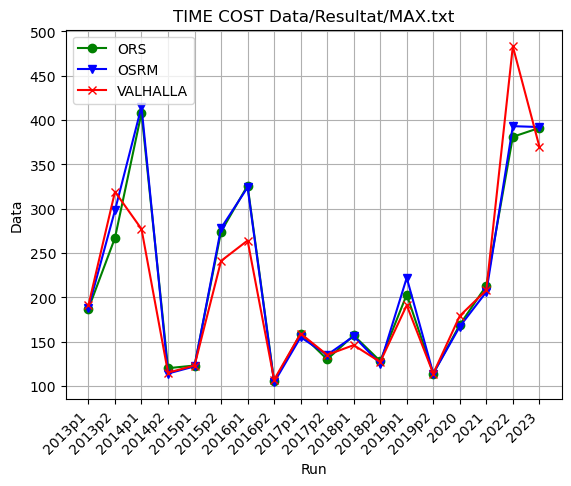

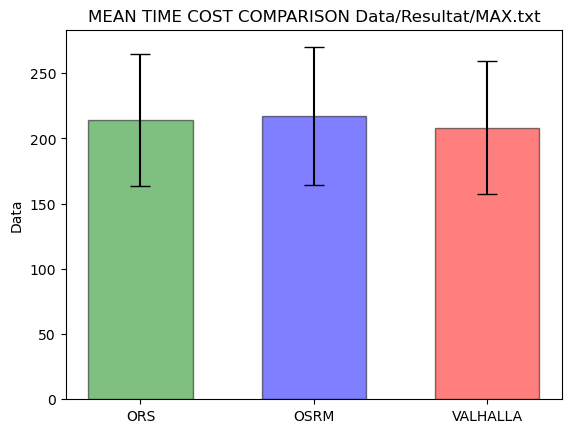

[0, 0, 131, 6, 1, 33, 62, 1, 4, 0, 11, 3, 12, 0, 2, 7, 0, 21]
[1, 31, 138, 0, 0, 37, 60, 0, 0, 5, 10, 0, 31, 0, 0, 0, 12, 22]
[4, 52, 0, 1, 1, 0, 0, 3, 4, 5, 0, 2, 0, 0, 12, 2, 102, 0]


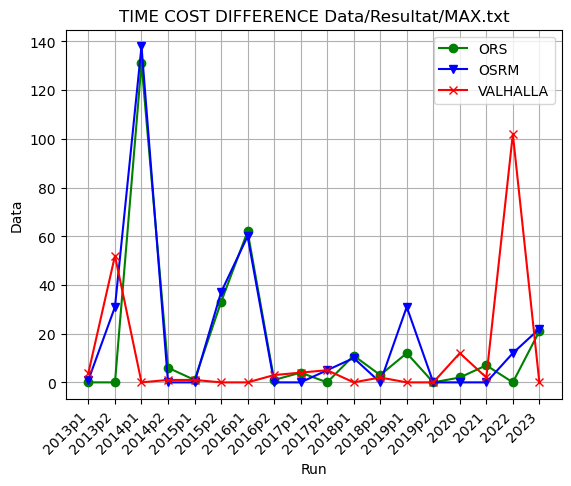

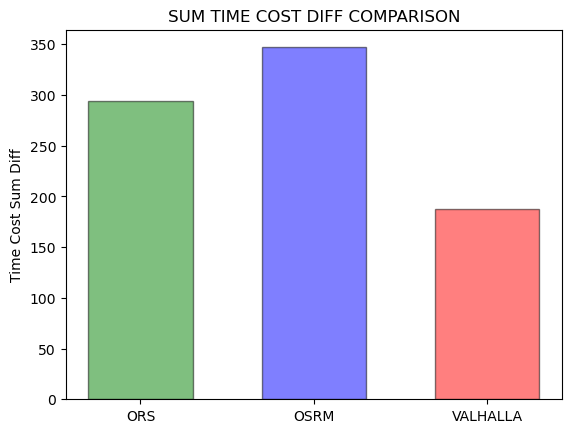

Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0


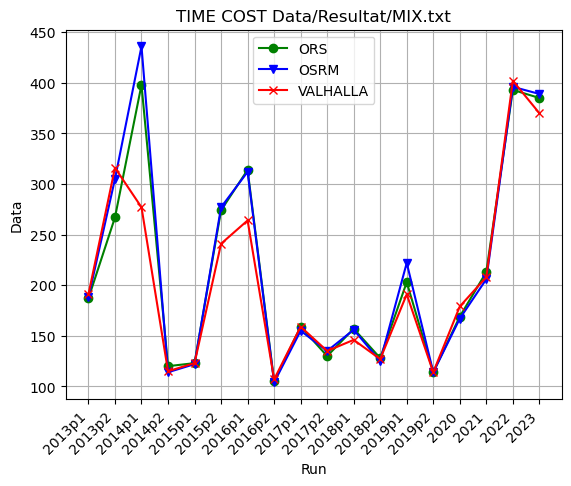

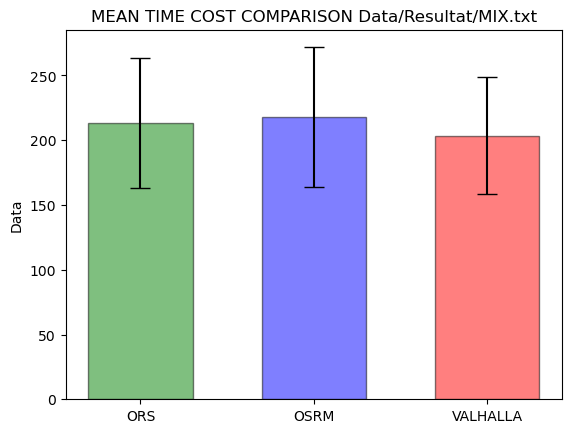

[0, 0, 121, 6, 1, 33, 50, 1, 4, 0, 11, 3, 12, 0, 2, 7, 0, 15]
[1, 38, 159, 0, 0, 36, 48, 0, 0, 5, 10, 0, 31, 0, 0, 0, 3, 19]
[4, 49, 0, 1, 1, 0, 0, 3, 4, 5, 0, 2, 0, 0, 12, 2, 9, 0]


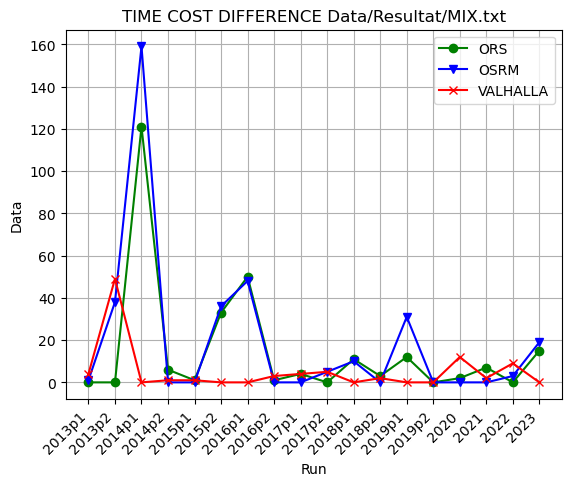

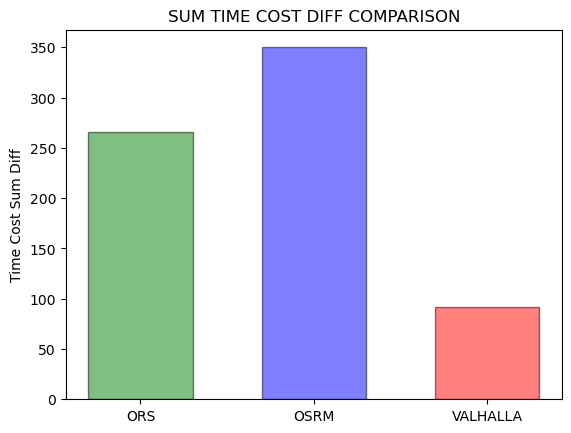

UNDELIVERED SHIPMENTS
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
UNDELIVERED SHIPMENTS
UNDELIVERED SHIPMENTS
UNDELIVERED SHIPMENTS
Route is 0
Route is 0
Route is 0
UNDELIVERED SHIPMENTS
UNDELIVERED SHIPMENTS
UNDELIVERED SHIPMENTS
Route is 0
Route is 0
Route is 0


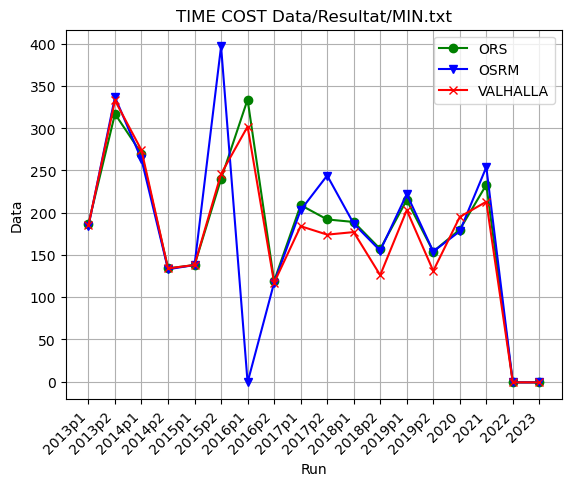

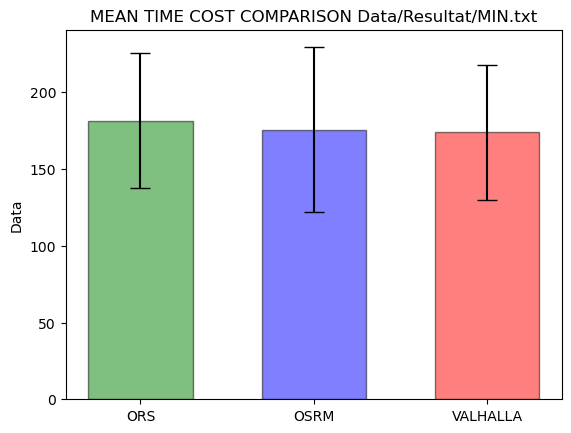

[3, 0, 7, 1, 0, 0, 32, 2, 25, 18, 12, 31, 12, 23, 2, 20, 0, 0]
[0, 20, 0, 0, 0, 157, 0, 0, 19, 70, 10, 29, 19, 23, 0, 41, 0, 0]
[1, 16, 11, 1, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0]


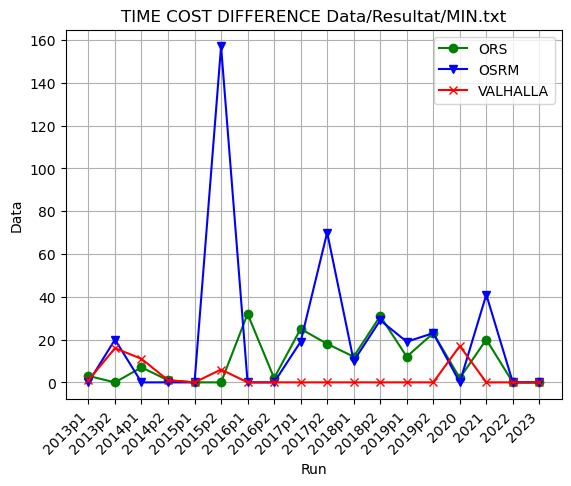

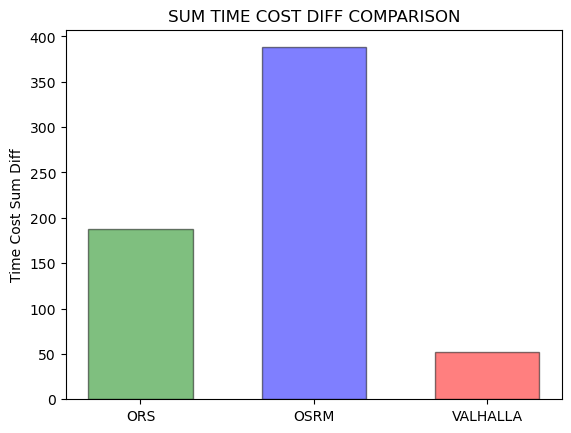

In [156]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return -h, +h

def make_graphs(filename,time_cost_method):
    #Read your data from file
    file = filename
    df = pd.read_csv(file, sep=",", header=0)
    # Plot line serie of data
    names=['ORS','OSRM','VALHALLA']
    ORS_start = 0
    ORS_end = 30
    OSRM_start = 30
    OSRM_end = 60
    VALHALLA_start = 60
    VALHALLA_end = 90
    ORS_y = []
    OSRM_y = []
    VALHALLA_y = []
    for a in range(1,23):    
        for name in names: 
            #x = range(1,19) 
#            if (df['TOTAL_COST'].iloc[ORS_start] != 0):
            if(name=='ORS'):
                for item in range(ORS_start,ORS_start+1):
                    if df['ALL_DELIVERED'].iloc[item]=='YES':
                        if df['TOTAL_COST'].iloc[item] != 0:
                            ORS_y.append(df['TOTAL_COST'].iloc[item])
                        else:
                            #print(df['ALL_DELIVERED'].iloc[item])
                            #print(df['TOTAL_COST'].iloc[item])
                            print("Route is 0")                
                    else:
                        print("UNDELIVERED SHIPMENTS")
                        ORS_y.append(-1)
            elif(name=='OSRM'):
                for item in range(OSRM_start,OSRM_start+1):
                    if df['ALL_DELIVERED'].iloc[item]=='YES':
                        if df['TOTAL_COST'].iloc[item] != 0:
                            OSRM_y.append(df['TOTAL_COST'].iloc[item])
                        else:
                            print("Route is 0")                
                    else:
                        print("UNDELIVERED SHIPMENTS")
                        OSRM_y.append(-1)
            elif(name=='VALHALLA'): 
                for item in range(VALHALLA_start,VALHALLA_start+1):
                    if df['ALL_DELIVERED'].iloc[item]=='YES':
                        if df['TOTAL_COST'].iloc[item] != 0:
                            VALHALLA_y.append(df['TOTAL_COST'].iloc[item]) 
                        else:
                            print("Route is 0")                
                    else:
                        print("UNDELIVERED SHIPMENTS")
                        VALHALLA_y.append(-1)
        ORS_start += 90
        ORS_end += 90
        OSRM_start += 90
        OSRM_end += 90
        VALHALLA_start += 90
        VALHALLA_end += 90
    x = ['2013p1','2013p2','2014p1','2014p2','2015p1','2015p2','2016p1','2016p2','2017p1','2017p2','2018p1','2018p2','2019p1','2019p2','2020','2021','2022','2023']
    #x = range(1,ORS_y.__len__()+1)
    plt.plot(x, ORS_y,color = 'green', label='ORS', marker='o')
    #x = range(1,OSRM_y.__len__()+1)
    plt.plot(x, OSRM_y,color = 'blue', label='OSRM', marker='v')
    #x = range(1,VALHALLA_y.__len__()+1)
    plt.plot(x, VALHALLA_y,color = 'red', label='VALHALLA', marker='x')
    plt.xlabel('Run')
    plt.ylabel('Data')
    plt.title(f'TIME COST {file}')
    plt.grid(True)
    plt.xticks(x)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.savefig(f"Data/Graphs/time-cost-{time_cost_method}.png")
    plt.show()
    #Call CI function
    CI_ors = mean_confidence_interval(ORS_y)
    CI_osrm =  mean_confidence_interval(OSRM_y)
    CI_valhalla =  mean_confidence_interval(VALHALLA_y)
    #print ("CIs ORS: ", CI_ors)
    #print ("CIs OSRM", CI_osrm)
    #print ("CIs VALHALLA:", CI_valhalla) 
    #print(ORS_y)
    #print(OSRM_y)
    #print(VALHALLA_y)
    dict = {
        'ORS':ORS_y,
        'OSRM':OSRM_y,
        'VALHALLA':VALHALLA_y
    }
    #print(dict)
    df2 = pd.DataFrame(dict)
    #print(df2['ORS'])
    # width of the bars
    barWidth = 0.6
    # Bars Data
    barsData = df2.mean()
    # The x-position order of bars
    barsOrder = range(len(df2.columns))
    # Std Bars Interval
    #barsInterval = df2.std()
    # Bars for CI Intervals
    df_CI = pd.DataFrame(list(zip(CI_ors, CI_osrm,CI_valhalla)), columns = ['ORS', 'OSRM', 'VALHALLA'])
    barsInterval = df_CI.iloc[1]
    #print(barsInterval)
    # Colours of bar charts
    colors=["green","blue","red" ]

    # Opacity of colours
    Opacity=0.5

    # Plot bars
    plt.bar(barsOrder, barsData, color = colors , edgecolor = 'black', width = barWidth, yerr=barsInterval, capsize=7, alpha=Opacity)

    #Put a tick on the x-axis undex each bar and label it with column name
    plt.xticks(range(len(df2.columns)), df2.columns)

    plt.ylabel('Data')
   
    plt.title(f'MEAN TIME COST COMPARISON {file}')
    plt.savefig(f"Data/Graphs/mean-time-cost-{time_cost_method}.png")
    plt.show()
    ors_diff = []
    osrm_diff = []
    valhalla_diff = []
    for i in range (0,ORS_y.__len__()):
        a = ORS_y[i]
        b = OSRM_y[i]
        c = VALHALLA_y[i]
        # Filter out -1 values
        values = [value for value in [a, b, c] if value != -1]
        if values:            
            min_value = min(values)
    
            diff_a = a - min_value if a != -1 else 0
            diff_b = b - min_value if b != -1 else 0
            diff_c = c - min_value if c != -1 else 0

            ors_diff.append(diff_a)
            osrm_diff.append(diff_b)
            valhalla_diff.append(diff_c)
        else:
            ors_diff.append(0)
            osrm_diff.append(0)
            valhalla_diff.append(0)
    #print(ors_diff)
    #print(osrm_diff)
    #print(valhalla_diff)
    #x = range(1,ors_diff.__len__()+1) 
    print(ors_diff)
    print(osrm_diff)
    print(valhalla_diff)
    plt.plot(x, ors_diff,color = 'green', label='ORS', marker='o')
    plt.plot(x, osrm_diff,color = 'blue', label='OSRM', marker='v')
    plt.plot(x, valhalla_diff,color = 'red', label='VALHALLA', marker='x')
    plt.xlabel('Run')
    plt.ylabel('Data')
    plt.title(f'TIME COST DIFFERENCE {file}')
    plt.grid(True)
    plt.xticks(x)
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.savefig(f"Data/Graphs/time-cost-diff-{time_cost_method}.png")
    plt.show()
    ors_sum_diff = sum(ors_diff)
    osrm_sum_diff = sum(osrm_diff)
    valhalla_sum_diff = sum(valhalla_diff)
    x = ['ORS','OSRM','VALHALLA']
    y = [ors_sum_diff,osrm_sum_diff,valhalla_sum_diff]

    plt.bar(x,y,color = colors, edgecolor = 'black', width = barWidth,alpha=Opacity)
    #Put a tick on the x-axis undex each bar and label it with column name
    plt.xticks(range(len(df2.columns)), df2.columns)

    plt.ylabel('Time Cost Sum Diff')
    
    #plt.xlabel('Browsers')
    plt.title('SUM TIME COST DIFF COMPARISON')
    plt.savefig(f"Data/Graphs/Sum-time-cost-diff-{time_cost_method}.png")
    plt.show()
make_graphs("Data/Resultat/MAX.txt","max")
make_graphs("Data/Resultat/MIX.txt","mix")
make_graphs("Data/Resultat/MIN.txt","min")

In [ ]:
print("Hello")

Hello
